# 0 - Initial import

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [26]:
df = pd.read_csv("PIE_data_with_context.csv", sep=";", header=0, index_col=0)
df.head()

,F_SESSION,F_START_FRAME,F_END_FRAME,F_DURATION,FIRST_WORD_INDEX,SECOND_WORD_INDEX,THIRD_WORD_INDEX,session,k_aircraft,k_operator,k_mission
0,3152409,742,789,00:00:24.000,3.0,10.0,285.0,3152409,41622,81,1
1,3152409,790,855,00:00:33.000,3.0,75.0,281.0,3152409,41622,81,1
2,3152409,856,965,00:00:55.000,3.0,10.0,8.0,3152409,41622,81,1
3,3152409,966,967,00:00:01.000,3.0,10.0,155.0,3152409,41622,81,1
4,3152409,968,1001,00:00:17.000,3.0,75.0,146.0,3152409,41622,81,1


In [27]:
df = df.sort_values(by=['F_SESSION', 'F_START_FRAME'], ascending=[True, True])
df.head()

,F_SESSION,F_START_FRAME,F_END_FRAME,F_DURATION,FIRST_WORD_INDEX,SECOND_WORD_INDEX,THIRD_WORD_INDEX,session,k_aircraft,k_operator,k_mission
879696,3130311,332,375,00:00:22.000,3.0,10.0,285.0,3130311,46852,20,-2
879697,3130311,376,441,00:00:33.000,3.0,75.0,281.0,3130311,46852,20,-2
879698,3130311,442,741,00:02:30.000,3.0,10.0,8.0,3130311,46852,20,-2
879699,3130311,742,760,00:00:09.500,3.0,28.0,39.0,3130311,46852,20,-2
879700,3130311,761,764,00:00:02.000,3.0,10.0,8.0,3130311,46852,20,-2


In [28]:
if (df['F_SESSION'] == df['session']).all():
    df.drop(columns=['session'], inplace=True)

# 1 - Study on the quantity of uniques

In [29]:
first = df['FIRST_WORD_INDEX']
second = df['SECOND_WORD_INDEX']
third = df['THIRD_WORD_INDEX']

print("Number of unique indexes:")
print("First word: ", len(df['FIRST_WORD_INDEX'].unique()))
print("Second word: ", len(df['SECOND_WORD_INDEX'].unique()))
print("Third word: ", len(df['THIRD_WORD_INDEX'].unique()))
print("Number of unique triplets: ", len(set(zip(first, second, third))))

Number of unique indexes:
First word:  12
Second word:  976
Third word:  1206
Number of unique triplets:  35068


In [30]:
len(df['F_SESSION'].unique())

1845

In [31]:
print("Number of unique:")
print("Aircraft: ", len(df['k_aircraft'].unique()))
print("Operators: ", len(df['k_operator'].unique()))
print("Missions: ", len(df['k_mission'].unique()))

Number of unique:
Aircraft:  61
Operators:  15
Missions:  4


In [32]:
# Group by the 'Flight' column and count the number of occurrences
flight_counts = df.groupby('F_SESSION').size().reset_index(name='count')
flight_counts = flight_counts.sort_values(by='count', ascending=False)
print(flight_counts)

      F_SESSION  count
141     3135532   6700
1175    3177926   6021
1390    3185031   5942
863     3168154   5765
1798    3201520   5587
...         ...    ...
1293    3180447      3
1045    3173880      2
208     3137700      1
157     3136063      1
945     3170845      1

[1845 rows x 2 columns]


In [33]:
df[df['F_SESSION'] == 3136063]

,F_SESSION,F_START_FRAME,F_END_FRAME,F_DURATION,FIRST_WORD_INDEX,SECOND_WORD_INDEX,THIRD_WORD_INDEX,k_aircraft,k_operator,k_mission
714684,3136063,163,167,00:00:02.500,3.0,10.0,285.0,48260,161,1


In [34]:
flight_counts['count'].describe()

count    1845.000000
mean     1341.605420
std       731.547304
min         1.000000
25%       866.000000
50%      1188.000000
75%      1613.000000
max      6700.000000
Name: count, dtype: float64

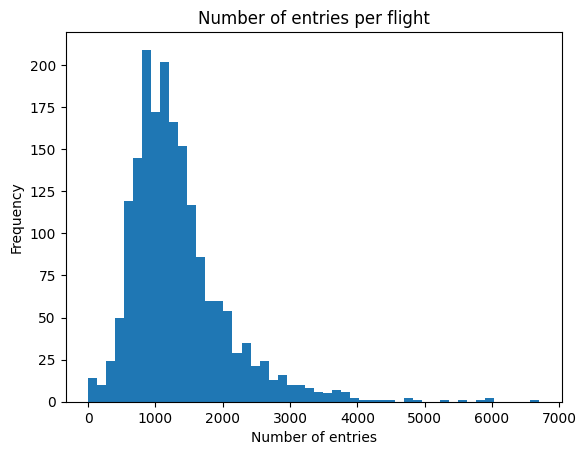

In [35]:
plt.hist(flight_counts['count'], bins=50)
plt.title('Number of entries per flight')
plt.xlabel('Number of entries')
plt.ylabel('Frequency')
plt.show()

# 2 - Close up on the amount of flight phases and their distribution

In [36]:
result_df = df.groupby(by=['FIRST_WORD_INDEX', 'SECOND_WORD_INDEX', 'THIRD_WORD_INDEX'])['F_SESSION'].nunique().reset_index(name='number_flights')
result_df.sort_values(by='number_flights', ascending=False)

,FIRST_WORD_INDEX,SECOND_WORD_INDEX,THIRD_WORD_INDEX,number_flights
31294,3.0,10.0,285.0,1840
31291,3.0,10.0,8.0,1839
31308,3.0,75.0,281.0,1836
31760,5.0,18.0,9.0,1820
33426,8.0,138.0,54.0,1811
...,...,...,...,...
35025,9.0,143.0,1029.0,1
35024,9.0,143.0,1004.0,1
35022,9.0,143.0,897.0,1
35020,9.0,143.0,660.0,1


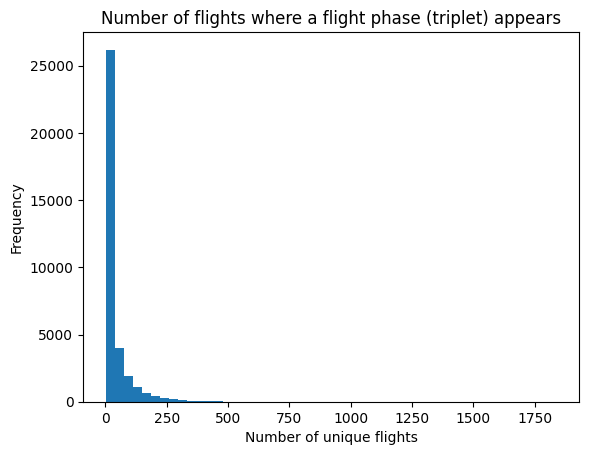

In [37]:
plt.hist(result_df['number_flights'], bins=50)
plt.title('Number of flights where a flight phase (triplet) appears')
plt.xlabel('Number of unique flights')
plt.ylabel('Frequency')
plt.show()

In [38]:
p = len(result_df[result_df['number_flights'] == 1])/len(result_df['number_flights'])
print(f"{p * 100:.2f}%")

17.88%


In [39]:
p = len(result_df[result_df['number_flights'] <= 4])/len(result_df['number_flights'])
print(f"{p * 100:.2f}%")

37.43%


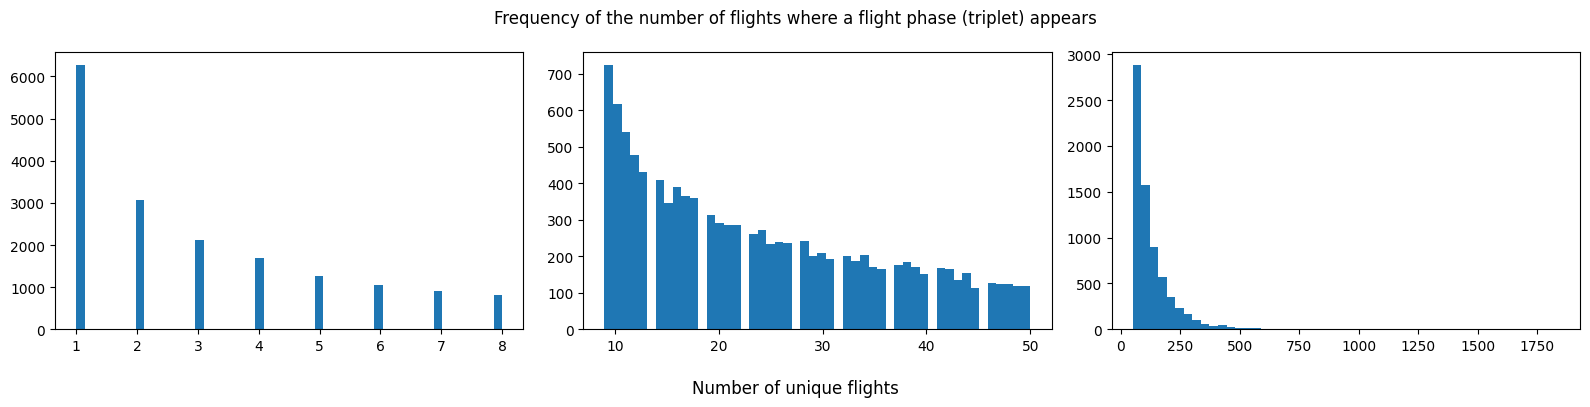

In [40]:
# Create subplots: 1 row, 3 columns
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

# Plot each graph
axs[0].hist(result_df[result_df['number_flights'] <= 8]['number_flights'], bins=50)

interval = (result_df['number_flights'] <= 50) & (result_df['number_flights'] > 8)
axs[1].hist(result_df[interval]['number_flights'], bins=50)

axs[2].hist(result_df[result_df['number_flights'] > 50]['number_flights'], bins=50)

# Adjust layout
fig.suptitle('Frequency of the number of flights where a flight phase (triplet) appears')
fig.supxlabel('Number of unique flights')
plt.tight_layout()
plt.show()

# 3 - Flight phase duration

In [41]:
df['F_DURATION'] = pd.to_timedelta(df['F_DURATION'])
df['F_DURATION_sec'] = df['F_DURATION'].dt.total_seconds()

<Axes: >

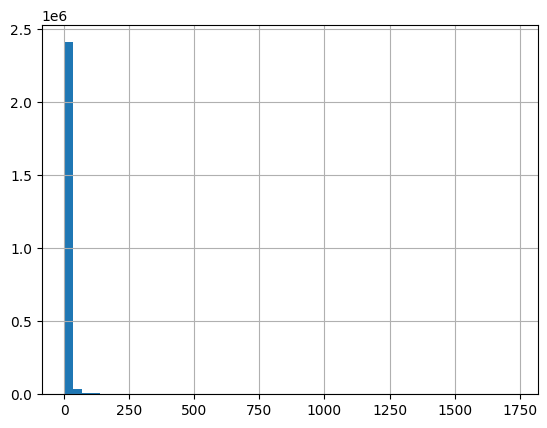

In [42]:
df['F_DURATION_sec'].hist(bins=50)

<Axes: >

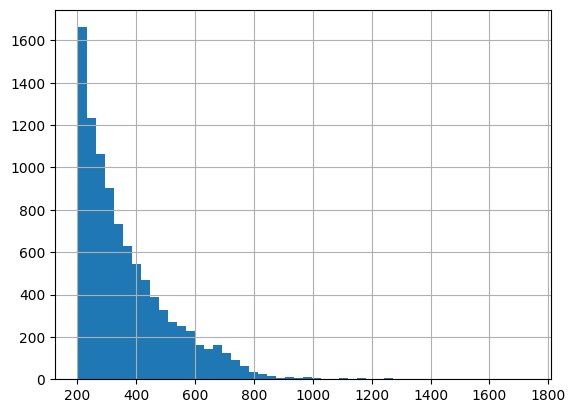

In [43]:
df[df['F_DURATION_sec'] > 200]['F_DURATION_sec'].hist(bins=50)

In [44]:
durations_count = pd.DataFrame(df['F_DURATION_sec'])
durations_count = durations_count.groupby('F_DURATION_sec').size().reset_index(name='count')
durations_count['percentage'] = durations_count['count']/len(df['F_DURATION_sec'])*100
durations_count

,F_DURATION_sec,count,percentage
0,0.5,1130290,45.663449
1,1.0,307124,12.407737
2,1.5,165326,6.679131
3,2.0,111459,4.502917
4,2.5,84029,3.394752
...,...,...,...
1579,1475.5,1,0.000040
1580,1494.0,1,0.000040
1581,1597.5,1,0.000040
1582,1659.0,1,0.000040


In [45]:
durations_count[durations_count['F_DURATION_sec'] > 50]

,F_DURATION_sec,count,percentage
100,50.5,503,0.020321
101,51.0,531,0.021452
102,51.5,528,0.021331
103,52.0,488,0.019715
104,52.5,416,0.016806
...,...,...,...
1579,1475.5,1,0.000040
1580,1494.0,1,0.000040
1581,1597.5,1,0.000040
1582,1659.0,1,0.000040


In [46]:
n = len(df['F_SESSION'])
min_duration = [0.5, 1, 2, 5, 10] # in seconds

for md in min_duration:
    df['quantity'] = np.ceil(df['F_DURATION_sec']/md)
    count = int(df['quantity'].sum())
    inc = (count/n - 1)*100

    print(f"Choosing {md} seconds : {count:,} rows, {inc:.2f}% increase")

Choosing 0.5 seconds : 29,749,488 rows, 1101.87% increase
Choosing 1 seconds : 15,721,697 rows, 535.15% increase
Choosing 2 seconds : 8,793,867 rows, 255.27% increase
Choosing 5 seconds : 4,740,834 rows, 91.53% increase
Choosing 10 seconds : 3,467,233 rows, 40.08% increase
